<a href="https://colab.research.google.com/github/moraes-ederson/Curso_DominandoDS_Flai/blob/main/4_ML_Classificacao_Fraude_Seguro_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigação de fraude de cadastro

Importação dos dados

In [ ]:
import pandas as pd
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.shape

(1338, 7)

Transformando variável Smoker numérica para categórica.

Dividindo valores dos custos por 1000 para facilitar a manipulação dos dados.

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [ ]:
import seaborn as sns

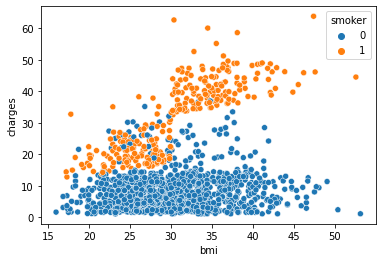

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

Olhando a variável Smoker como resposta para prever fraudes cadastrais. Ou seja, fumante dizer que não é fumante no cadastro.

O modelo deve prever a base de dados para saber se é ou não fumante.

O modelo deve estar interessado no erro em vez do acerto.

Com isso, no gráfico a partir do gráfico acima, o modelo deverá ser capaz de fazer um traçado separando as regiões de fumantes(laranja) e não fumantes(azul).

In [ ]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

In [ ]:
X.head()

,bmi,charges
0,27.900,16.884924
1,33.770,1.725552
2,33.000,4.449462
3,22.705,21.984471
4,28.880,3.866855


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

## Validação Cruzada

In [ ]:
# Configuração da validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
# Escrevendo a validação
kf = KFold(n_splits = 10, shuffle = True)

## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# utilizando o modelo ainda com os parâmetros default
modelo = LogisticRegression()

In [ ]:
y.describe()

count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker, dtype: float64

# Desempenho do Modelo

In [ ]:
# Checando através da validão cruzada
metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy'])

In [ ]:
metricas

{'fit_time': array([0.02481294, 0.01046419, 0.01056242, 0.00947666, 0.01015353,
        0.01109862, 0.0091362 , 0.01036072, 0.01134634, 0.01569819]),
 'score_time': array([0.00117064, 0.00112867, 0.00106931, 0.0010643 , 0.00118232,
        0.00110793, 0.00108528, 0.0011692 , 0.00158215, 0.00184464]),
 'test_accuracy': array([0.8880597 , 0.93283582, 0.92537313, 0.97761194, 0.92537313,
        0.90298507, 0.94776119, 0.91044776, 0.96240602, 0.94736842])}

In [ ]:
metricas['test_accuracy']

array([0.8880597 , 0.93283582, 0.92537313, 0.97761194, 0.92537313,
       0.90298507, 0.94776119, 0.91044776, 0.96240602, 0.94736842])

In [ ]:
metricas['test_accuracy'].mean()

0.9320222197284256

O resultado da acurácia acima representa a porcentagem de acerto que o modelo classificou os dados.

Ou seja, a distribuição do gráfico de dispersão mais acima está classificada 93% corretamente.

In [ ]:
# calculando a validação com mais métricas
metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy', 'recall', 'precision'])

In [ ]:
metricas

{'fit_time': array([0.01537395, 0.01008081, 0.01040459, 0.00946212, 0.00909209,
        0.01117349, 0.00939822, 0.00971007, 0.0094676 , 0.00902009]),
 'score_time': array([0.00310922, 0.00269675, 0.00427842, 0.00272274, 0.00277114,
        0.00286984, 0.00275111, 0.00278473, 0.00274563, 0.00271487]),
 'test_accuracy': array([0.90298507, 0.91791045, 0.94029851, 0.92537313, 0.95522388,
        0.91791045, 0.91791045, 0.94776119, 0.94736842, 0.95488722]),
 'test_precision': array([0.79310345, 0.82608696, 0.82758621, 0.81481481, 0.91304348,
        0.84375   , 0.9047619 , 0.88      , 0.85714286, 1.        ]),
 'test_recall': array([0.76666667, 0.73076923, 0.88888889, 0.81481481, 0.84      ,
        0.81818182, 0.67857143, 0.84615385, 0.88888889, 0.76      ])}

In [ ]:
print('Acuracia: ', metricas['test_accuracy'].mean())
print('Sensibilidade: ', metricas['test_recall'].mean())
print('VPP: ', metricas['test_precision'].mean())

Acuracia:  0.9327628773426101
Sensibilidade:  0.8032935582935583
VPP:  0.8660289666674599


A **sensibilidade** mostra a porcentagem de acerto em relação a todos os elementos positivos do conjunto de dados.

E o **VPP** mostra a porcentagem de acerto em relação a tudo que o modelo classificou como positivo.

### Região de Decisão

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


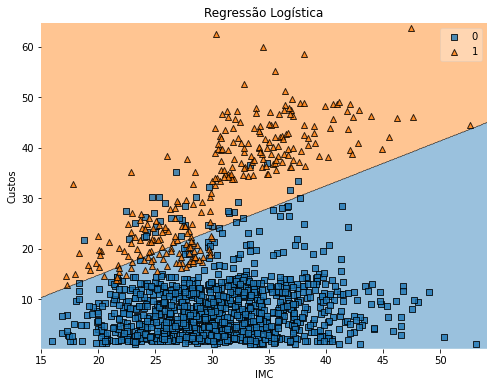

In [ ]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

modelo = LogisticRegression()
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Regressão Logística')  
plt.show()

O gráfico acima ilustra as métricas obtidas anteriormente. E o modelo traça uma reta onde ele divide a classifição entre as cores Laranja e Azul. Isso significa que os pontos azuis que estão na área laranja, são erros, pois deveriam ser laranja. E vice-versa. Então abaixo da linha é erro de Falso Negativo e acima da linha, Falso Positivo.

## KNN

Implementação do modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors = 25)

metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy', 'recall', 'precision'])

print('Acuracia: ', metricas['test_accuracy'].mean())
print('Sensibilidade: ', metricas['test_recall'].mean())
print('VPP: ', metricas['test_precision'].mean())


Acuracia:  0.9596285489844012
Sensibilidade:  0.9592248735399019
VPP:  0.8626869611114166


### Região de Decisão

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


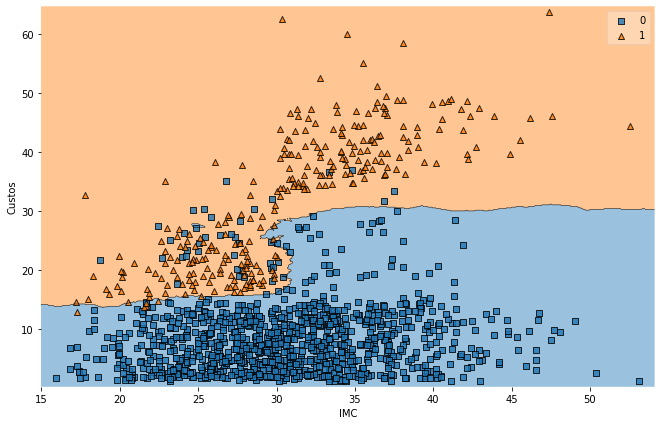

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (11, 7))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

## Árvores de Decisão

Implementação do modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 5)

metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy', 'recall', 'precision'])

print('Acuracia: ', metricas['test_accuracy'].mean())
print('Sensibilidade: ', metricas['test_recall'].mean())
print('VPP: ', metricas['test_precision'].mean())

Acuracia:  0.946930759735159
Sensibilidade:  0.8970928801590567
VPP:  0.846751566666374


### Região de Decisão

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


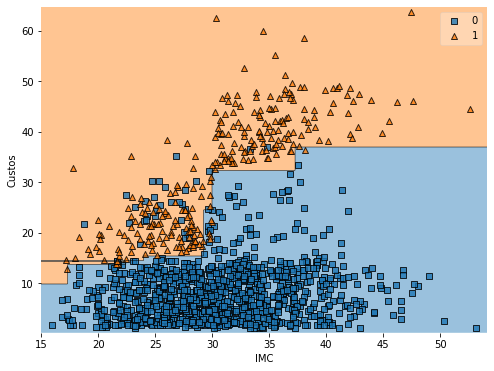

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

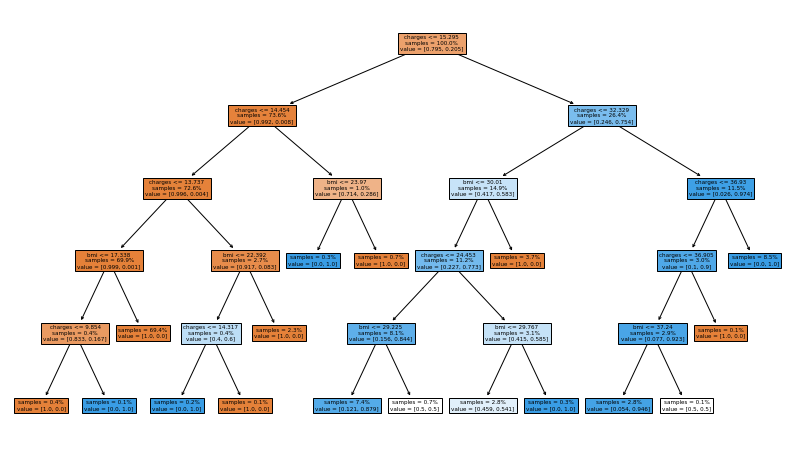

In [ ]:
# plotando a árvore de regressão

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()